In [31]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score as sil
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [4]:
esg = pd.read_excel('/gdrive/MyDrive/금융시장의 빅데이터분석 - 텀페이퍼 /최종코드/esg_final_with_dummy.xlsx')
esg

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2,83,1,0,0,0,0,0,0,0
1,1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2,83,1,0,0,0,0,0,0,0
2,2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2,83,1,0,0,0,0,0,0,0
3,3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2,83,1,0,0,0,0,0,0,0
4,4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,9,314,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,556,화인베스틸,133820,3,3,2,3,8.141025e+10,0.001232,1차 철강 제조업,제조업,25.122767,4,9,314,0,0,0,0,0,0,0,1
557,557,환인제약,16580,3,1,4,4,3.106212e+11,0.000549,의약품 제조업,제조업,26.461840,3,9,314,0,0,0,0,0,0,0,1
558,558,휴온스,243070,3,1,4,3,6.106300e+11,0.001476,의약품 제조업,제조업,27.137757,4,9,314,0,0,0,0,0,0,0,1
559,559,휴온스글로벌,84110,3,1,4,3,3.353257e+11,-0.000060,의약품 제조업,제조업,26.538368,2,9,314,0,0,0,0,0,0,0,1


박은진, <ESG전략이 기업의 재무 성과에 미치는 영향(2018)>, KAIST 기준으로 score 부여

In [5]:
grade_mapper = {6 : 120, 5 : 110, 4 : 100, 3 : 90, 2 : 80, 1 : 70}
esg['e'] = esg['e'].map(grade_mapper)
esg['s'] = esg['s'].map(grade_mapper)
esg['g'] = esg['g'].map(grade_mapper)
esg['esg'] = esg['esg'].map(grade_mapper)
esg.head()

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,sector_class,AV_log,ret_group,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,BNK금융지주,138930,120,100,120,120,1.851312e+12,-0.000826,기타 금융업,금융 및 보험업,28.246916,1,2,83,1,0,0,0,0,0,0,0
1,1,DGB금융지주,139130,120,110,120,120,1.148500e+12,0.000187,기타 금융업,금융 및 보험업,27.769478,2,2,83,1,0,0,0,0,0,0,0
2,2,JB금융지주,175330,120,110,110,120,1.110984e+12,0.000460,기타 금융업,금융 및 보험업,27.736267,2,2,83,1,0,0,0,0,0,0,0
3,3,KB금융,105560,120,120,120,120,1.804606e+13,0.000152,기타 금융업,금융 및 보험업,30.523949,2,2,83,1,0,0,0,0,0,0,0
4,4,S-Oil,10950,120,110,120,120,7.790729e+12,-0.000677,석유 정제품 제조업,제조업,29.683956,1,9,314,0,0,0,0,0,0,0,1


In [6]:
esg.groupby('sector_class')['sector_class'].count()

sector_class
건설업                          18
금융 및 보험업                     83
도매 및 소매업                     41
사업시설 관리, 사업 지원 및 임대 서비스업      6
운수 및 창고업                     20
전기, 가스, 증기 및 공기 조절 공급업       10
전문, 과학 및 기술 서비스업             23
정보통신업                        48
제조업                         312
Name: sector_class, dtype: int64

In [7]:
esg.columns

Index(['Unnamed: 0', 'company', 'code', 'esg', 'e', 's', 'g', 'AV', 'ret',
       'sector', 'sector_class', 'AV_log', 'ret_group', 'sector_num',
       'sector_count', 'sector_2', 'sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9'],
      dtype='object')

In [8]:
esg = esg.dropna()
len(esg)

559

# Model 1
### Sector, 시가총액 포함 Clustering

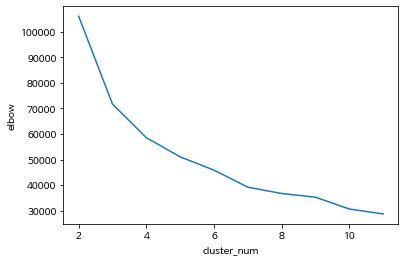

In [32]:
all_scores = []
features1 = ['e', 's', 'g', 'AV_log', 'sector_2', 'sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9']
for i in range(10):
    i = i + 2
    model1 = KMeans(n_clusters=i)
    model1.fit(esg[features1])
    sil_score = sil(esg[features1], model1.labels_)
    # 새로운 모델 만들 때마다 fit(학습) 하고 실루엣 방식으로 점수를 뽑아냄
    elbow_score = model1.inertia_
    score_dict = {'cluster_num' : i, 'sil_score' : sil_score, 'elbow' : elbow_score}
    all_scores.append(score_dict)

score_df = pd.DataFrame(all_scores)
sns.lineplot(data=score_df, x='cluster_num', y='elbow')
# 적정 cluster_num = 3 or 4

In [38]:
model1 = KMeans(n_clusters = 3)
esg_1 = esg.copy()
model1.fit(esg_1[features1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
esg_1['cluster'] = model1.labels_

### Statistics of each Cluster

In [40]:
cluster_df = esg_1.groupby('cluster').agg({'e' : np.mean, 's' : np.mean, 'g' : np.mean, 'AV_log' : np.mean})
cluster_0 = esg_1.loc[esg_1['cluster'] == 0]
cluster_1 = esg_1.loc[esg_1['cluster'] == 1]
cluster_2 = esg_1.loc[esg_1['cluster'] == 2]
#cluster_3 = esg_1.loc[esg_1['cluster'] == 3]

cluster_df['ret'] = [cluster_0['ret'].mean(), cluster_1['ret'].mean(), cluster_2['ret'].mean()]
cluster_df['ret_sd'] = [cluster_0['ret'].std(), cluster_1['ret'].std(), cluster_2['ret'].std()]
cluster_df.sort_values(by = 'ret', ascending = False)

,e,s,g,AV_log,ret,ret_sd
cluster,,,,,,
0,92.279070,92.372093,94.093023,26.471750,0.001373,0.001737
2,74.368932,95.582524,97.087379,26.726463,0.001215,0.001682
1,103.840580,114.130435,106.521739,28.437017,0.001032,0.001603


* 오히려 e, s, g가 높은 cluster의 ret 값이 가장 낮게 나타남

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


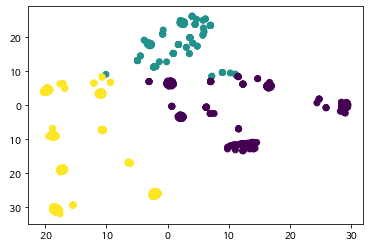

In [41]:
feature_df1 = pd.DataFrame(esg_1[features1])

transformed1 = TSNE(n_components=2).fit_transform(feature_df1)
xs = transformed1[:,0]
ys = transformed1[:,1]
plt.scatter(xs,ys, c=esg_1['cluster'])  #라벨은 색상으로 분류됨

plt.show()

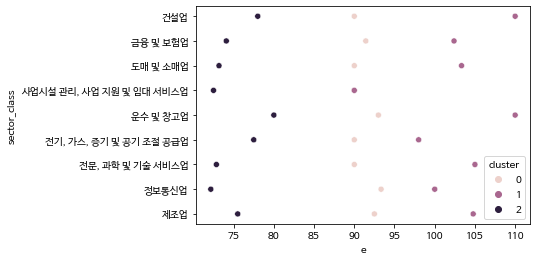

In [42]:
x = 'e'
y = 'sector_class'
hue = 'cluster'

scatter_df = esg_1.groupby([y, hue]).agg({x : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

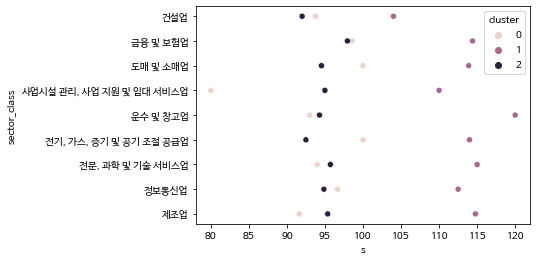

In [43]:
x = 's'
y = 'sector_class'
hue = 'cluster'

scatter_df = esg_1.groupby([y, hue]).agg({x : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

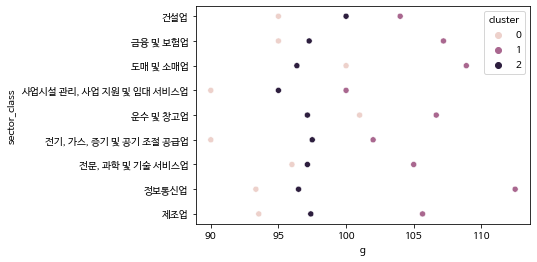

In [44]:
x = 'g'
y = 'sector_class'
hue = 'cluster'

scatter_df = esg_1.groupby([y, hue]).agg({x : np.mean}).reset_index()
sns.scatterplot(data = scatter_df, x = x, y = y, hue = hue)

* 3개의 seaborn 그래프를 통해 알 수 있는 것
    - sector를 기준으로 그래프를 나누었을 때에는 큰 관련성을 찾을 수 없음
    - e, s, g(x축들)을 기준으로 그래프를 나누면 같은 색깔(cluster)끼리 모여있는 경향성이 있음
    - e에서 더욱 두드러짐
* Sector보다 e, s, g에 의해 cluster이 나누어지는 경향이 강함

# Model 2
### Sector 미포함 Clustering

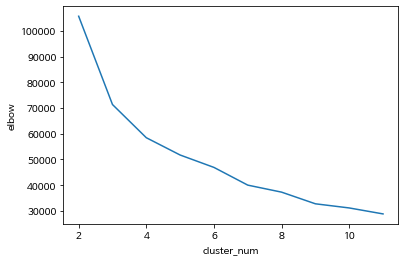

In [45]:
all_scores = []
features2 = ['e', 's', 'g', 'AV_log']
for i in range(10):
    i = i + 2
    model2 = KMeans(n_clusters=i)
    model2.fit(esg[features2])
    sil_score = sil(esg[features2], model2.labels_)
    elbow_score = model2.inertia_
    score_dict = {'cluster_num' : i, 'sil_score' : sil_score, 'elbow' : elbow_score}
    all_scores.append(score_dict)

score_df = pd.DataFrame(all_scores)
sns.lineplot(data=score_df, x='cluster_num', y='elbow')
# 적정 cluster_num = 3 or 4

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


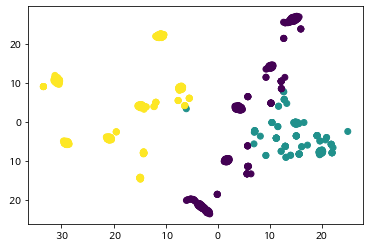

In [46]:
features2 = ['e', 's', 'g', 'AV_log']
model2 = KMeans(n_clusters = 3)
esg_2 = esg.copy()
model2.fit(esg_2[features2])
esg_2['cluster'] = model2.labels_

feature_df2 = pd.DataFrame(esg_2[features2])

transformed2 = TSNE(n_components=2).fit_transform(feature_df2)
xs = transformed2[:,0]
ys = transformed2[:,1]
plt.scatter(xs,ys, c=esg_2['cluster'])  #라벨은 색상으로 분류됨

plt.show()

* 첫 모델보다 Cluster의 구간이 불명확하게 나누어짐
* BUT, 각 Cluster 의 퍼져있는 정도가 Sector을 포함했을 때와 크게 다르지는 않음

# Model 3
### Sector, 시가총액 미포함 Clustering

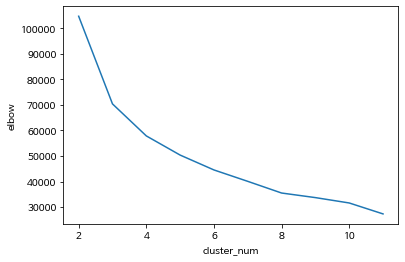

In [51]:
all_scores = []
features3 = ['e', 's', 'g']

for i in range(10):
    i = i + 2
    model3 = KMeans(n_clusters=i)
    model3.fit(esg[features3])
    sil_score = sil(esg[features3], model3.labels_)
    elbow_score = model3.inertia_
    score_dict = {'cluster_num' : i, 'sil_score' : sil_score, 'elbow' : elbow_score}
    all_scores.append(score_dict)

score_df = pd.DataFrame(all_scores)
sns.lineplot(data=score_df, x='cluster_num', y='elbow')
# 적정 cluster_num = 3 or 4

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


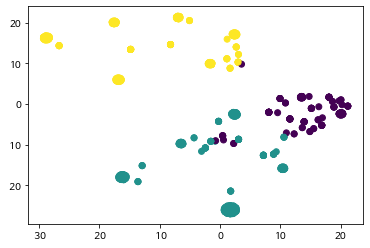

In [52]:
model3 = KMeans(n_clusters = 3)

esg_3 = esg.copy()
model3.fit(esg_3[features3])
esg_3['cluster'] = model3.labels_

feature_df3 = pd.DataFrame(esg_3[features3])

transformed3 = TSNE(n_components=2).fit_transform(feature_df3)
xs = transformed3[:,0]
ys = transformed3[:,1]
plt.scatter(xs,ys, c=esg_3['cluster'])

plt.show()

* 시가총액을 포함한 두 개의 모델에 비해 cluster이 일정하게 모여있지 않음을 확인
* 노란색/초록색 Cluster은 매우 중구난방

# Model 4
### E, S, G 미포함 Clustering

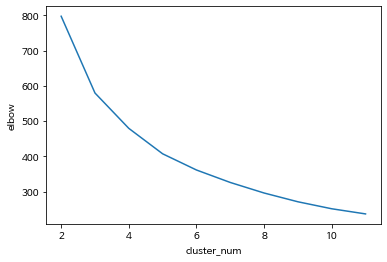

In [59]:
all_scores = []
features4 = ['AV_log', 'sector_2', 'sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9']

for i in range(10):
    i = i + 2
    model4 = KMeans(n_clusters=i)
    model4.fit(esg[features4])
    sil_score = sil(esg[features4], model4.labels_)
    elbow_score = model4.inertia_
    score_dict = {'cluster_num' : i, 'sil_score' : sil_score, 'elbow' : elbow_score}
    all_scores.append(score_dict)

score_df = pd.DataFrame(all_scores)
sns.lineplot(data=score_df, x='cluster_num', y='elbow')
# 적정 cluster_num = 3

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


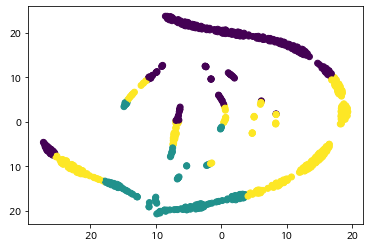

In [60]:
model4 = KMeans(n_clusters = 3)

esg_4 = esg.copy()
model4.fit(esg_4[features4])
esg_4['cluster'] = model4.labels_

feature_df4 = pd.DataFrame(esg_4[features4])

transformed4 = TSNE(n_components=2).fit_transform(feature_df4)
xs = transformed4[:,0]
ys = transformed4[:,1]
plt.scatter(xs,ys, c=esg_4['cluster'])

plt.show()

In [61]:
cluster_df = esg_4.groupby('cluster').agg({'e' : np.mean, 's' : np.mean, 'g' : np.mean, 'AV_log' : np.mean})
cluster_0 = esg_4.loc[esg_4['cluster'] == 0]
cluster_1 = esg_4.loc[esg_4['cluster'] == 1]
cluster_2 = esg_4.loc[esg_4['cluster'] == 2]

cluster_df['ret'] = [cluster_0['ret'].mean(), cluster_1['ret'].mean(), cluster_2['ret'].mean()]
cluster_df['ret_sd'] = [cluster_0['ret'].std(), cluster_1['ret'].std(), cluster_2['ret'].std()]
cluster_df.sort_values(by = 'ret', ascending = False)

,e,s,g,AV_log,ret,ret_sd
cluster,,,,,,
1,97.031250,108.046875,103.593750,29.289579,0.001526,0.001901
2,86.508621,99.439655,98.275862,27.119503,0.001236,0.001617
0,85.427136,92.462312,94.824121,25.530630,0.001035,0.001599


# Feature Importance

In [53]:
from sklearn.ensemble import RandomForestClassifier as rf 

label = 'ret_group'
#features = ['e', 's', 'g', 'AV_log', 'sector_num']
features = ['esg', 'AV_log', 'sector_num']

model = rf()
model.fit(esg[features], esg[label])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

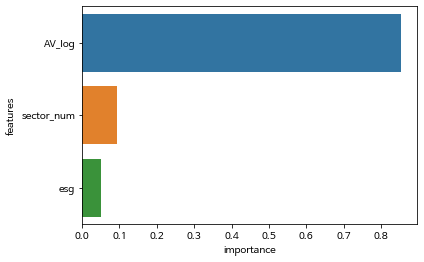

In [54]:
imp = pd.DataFrame()
imp['importance'] = model.feature_importances_
imp['features'] = features
imp = imp.sort_values(by = 'importance', ascending = False)
sns.barplot(data = imp, x = 'importance', y = 'features')

* esg의 importance가 매우 낮게 나타나지만, 이는 esg 통합등급에 A, B만 포함되어 있어 변별력이 없기 때문에 나타나는 결과로 추정

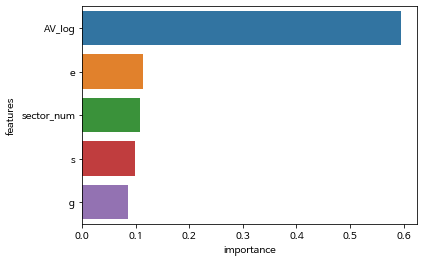

In [55]:
from sklearn.ensemble import RandomForestClassifier as rf 

label = 'ret_group'
features = ['e', 's', 'g', 'AV_log', 'sector_num']
#features = ['esg', 'AV_log', 'sector_num']

model = rf()
model.fit(esg[features], esg[label])

imp = pd.DataFrame()
imp['importance'] = model.feature_importances_
imp['features'] = features
imp = imp.sort_values(by = 'importance', ascending = False)
sns.barplot(data = imp, x = 'importance', y = 'features')

* Sector_num의 중요도가 e보다 낮음